# Peakfit class example
Fitting is based on the LMfit library: https://lmfit.github.io/lmfit-py/index.html

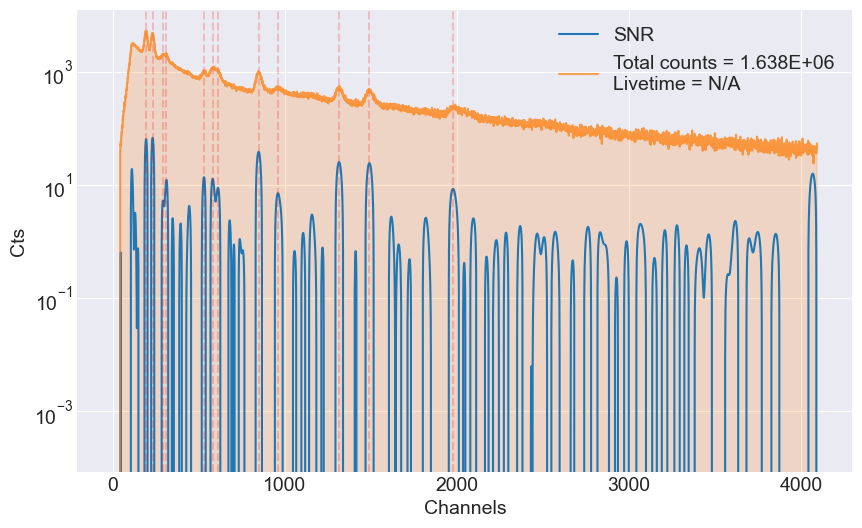

In [1]:
from nasagamma import spectrum as sp
import numpy as np
import pandas as pd
from nasagamma import peaksearch as ps
from nasagamma import peakfit as pf


# dataset 1
file = "data/gui_test_data_cebr.csv"
df = pd.read_csv(file)

# Required input parameters (in channels)
fwhm_at_0 = 1.0
ref_fwhm = 31
ref_x = 1220
min_snr = 5

# instantiate a Spectrum object
spect = sp.Spectrum(counts=df["counts"])

# instantiate a Search object
search = ps.PeakSearch(spect, ref_x, ref_fwhm, fwhm_at_0, min_snr=min_snr)
search.plot_peaks()

We can now define a background type: linear, quadratic, exponential, or any other n-degree polynomial.
We also define a range of x-values to perform the fit

In [3]:
# peakfit class
bkg0 = "poly1" # try polyn or exponential
xrange = [1250, 1400]
# perform fit
fit = pf.PeakFit(search, xrange, bkg=bkg0)

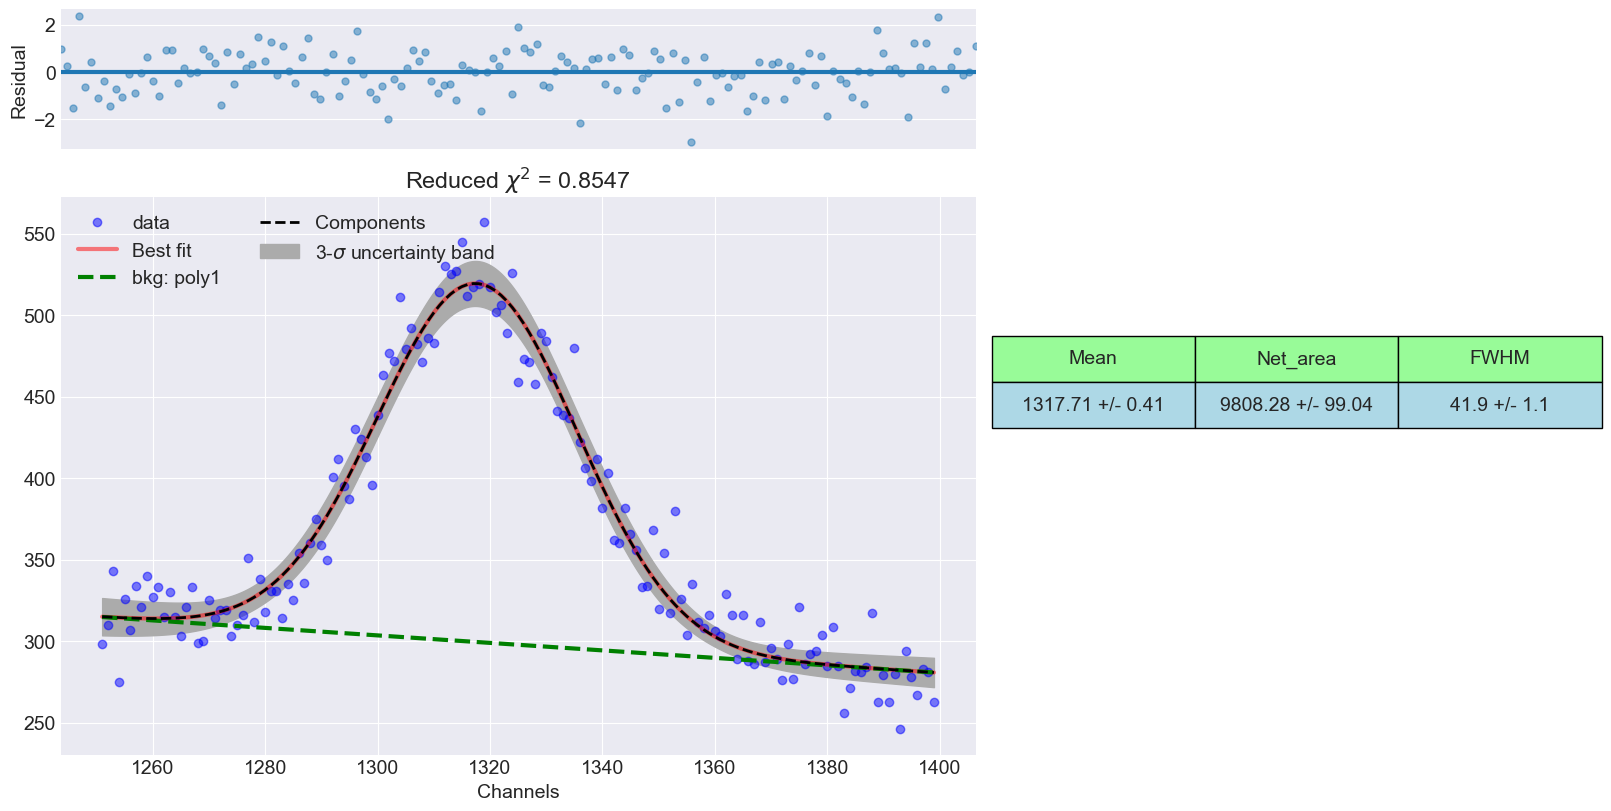

In [4]:
fit.plot(plot_type="full", legend='on')

One can try changing the x-range and background type and see how things change.

We now perform a fit of two peaks at the same time.

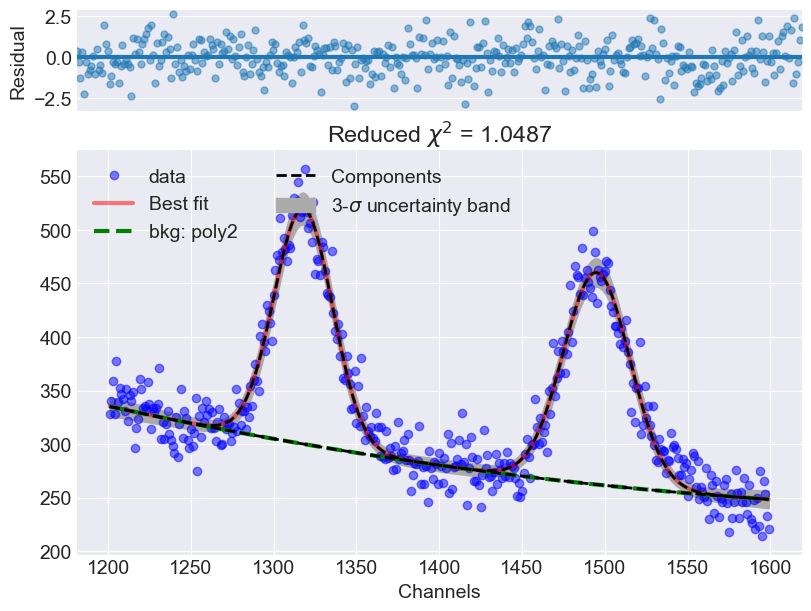

In [7]:
fit2 = pf.PeakFit(search, xrange=[1200,1600], bkg="poly2")
fit2.plot()

We can recover the lmfit object as follows

In [12]:
result = fit2.fit_result
type(result)

lmfit.model.ModelResult

In [13]:
print(result.fit_report())

[[Model]]
    ((Model(polynomial) + Model(gaussian, prefix='g1_')) + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 399
    # variables        = 9
    chi-square         = 408.992177
    reduced chi-square = 1.04869789
    Akaike info crit   = 27.8691104
    Bayesian info crit = 63.7697632
    R-squared          = 0.99981383
[[Variables]]
    c0:            1154.18944 +/- 160.823739 (13.93%) (init = -2224.027)
    c1:           -1.03085474 +/- 0.23056585 (22.37%) (init = 3.870854)
    c2:            2.9045e-04 +/- 8.2027e-05 (28.24%) (init = -0.001449672)
    g1_amplitude:  9726.44508 +/- 255.363173 (2.63%) (init = 7770.537)
    g1_center:     1317.85686 +/- 0.42975837 (0.03%) (init = 1316)
    g1_sigma:      17.6646122 +/- 0.45318312 (2.57%) (init = 14.09621)
    g1_fwhm:       41.5969822 +/- 1.06716468 (2.57%) == '2.3548200*g1_sigma'
    g1_height:     219.664622 +/- 5.05459230 (2.30%) == '0.3989

In [15]:
fit2.peak_info #  print some basic information about the fitted peaks

[{'mean1': 1317.8568617858602,
  'area1': 9726.445075419411,
  'fwhm1': 41.60016180926824},
 {'mean2': 1495.0248310724483,
  'area2': 9993.22658053953,
  'fwhm2': 47.43188487384076}]